In [1]:
import os

files = [f for f in os.listdir('.') if os.path.isfile(f)]
for f in files:
    print(f)

gender_submission.csv
README.md
test.csv
Titanic_survivor_analysis.ipynb
train.csv


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

#Enable matplotlib notebooks
%matplotlib notebook
import mpld3
mpld3.enable_notebook()

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# Information about the train and test data sets

## Train_df

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Test_df

In [7]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Fill missing fare value

In [10]:
mask = test_df['Fare'].isna()
test_df.loc[mask,'Fare'] = test_df['Fare'].mean()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Each name string has a title (eg. Mr, Mrs, Dr). Make a new "Title" column based on the title. This helps filling the missing age values based on this titles group

In [11]:
string_list = [', Mrs',', Mr',', Rev',', Miss',', Master',', Don',', Dr',', Mme',', Major',', Sir',', Ms',', Lady',', Mlle',', Col',', Capt',', the Countess',', Jonkheer']

train_df['Title'] = (train_df['Name']).str.findall('|'.join(string_list)).apply(lambda x: ','.join(map(str, x)))
train_df['Title'].value_counts()

train_df['Title'] = train_df['Title'].apply(lambda x: x.replace(', ', ''))
train_df['Title'] = train_df['Title'].astype('category')

In [12]:
string_list = [', Mrs',', Mr',', Rev',', Miss',', Master',', Don',', Dr',', Mme',', Major',', Sir',', Ms',', Lady',', Mlle',', Col',', Capt',', the Countess',', Jonkheer']

test_df['Title'] = (test_df['Name']).str.findall('|'.join(string_list)).apply(lambda x: ','.join(map(str, x)))
test_df['Title'].value_counts()

test_df['Title'] = test_df['Title'].apply(lambda x: x.replace(', ', ''))
test_df['Title'] = test_df['Title'].astype('category')



![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### The age column has missing values. Fill the missing values by grouping the dataframe based on 'Title' and 'Pclass' columns and taking the median age for the groups

In [13]:
train_df['Age_filled'] = train_df.groupby(['Title', 'Pclass'])['Age']\
    .transform(lambda x: x.fillna(x.median()))

In [14]:
test_df['Age_filled'] = test_df.groupby(['Title', 'Pclass'])['Age']\
    .transform(lambda x: x.fillna(x.median()))



# Only 1 Ms. in test_df so fill that with median grouped by Pclass

test_df['Age_filled'] = test_df.groupby(['Pclass'])['Age']\
    .transform(lambda x: x.fillna(x.median()))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Make 'Sex' column into categorical

In [15]:
train_df['Sex'] = train_df['Sex'].astype('category')

In [16]:
test_df['Sex'] = test_df['Sex'].astype('category')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# ANALYSIS BASED ON THE DATA

### Did women die more often than men?

In [17]:
train_df.groupby(['Survived']
)['Sex'].value_counts()

Survived        
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

### Clearly females were more likely to survive

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


### Does owning a cabin affect survival?? 

In [18]:
train_df['Cabin or not'] = train_df['Cabin'].notnull()
test_df['Cabin or not'] = test_df['Cabin'].notnull()

In [19]:
train_df.groupby(['Survived'])['Cabin or not'].value_counts()

Survived  Cabin or not
0         False           481
          True             68
1         False           206
          True            136
Name: Cabin or not, dtype: int64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


### Higher passenger class == higher chance of survival??

In [20]:
train_df.groupby(['Survived'])['Pclass'].mean()

Survived
0    2.531876
1    1.950292
Name: Pclass, dtype: float64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


### Survivors and people who died were nearly of same age, need further analysis on this

In [21]:
train_df.groupby(['Survived'])['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


### Survivors paid a higher ticket price == maybe wealthier people were more likely to survive?

In [22]:
train_df.groupby(['Survived'])['Fare'].mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

In [23]:
train_df.groupby(['Survived'])['SibSp'].mean()

Survived
0    0.553734
1    0.473684
Name: SibSp, dtype: float64

In [24]:
train_df.groupby(['Survived'])['Parch'].mean()

Survived
0    0.329690
1    0.464912
Name: Parch, dtype: float64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


# Data visualisation

<IPython.core.display.Javascript object>


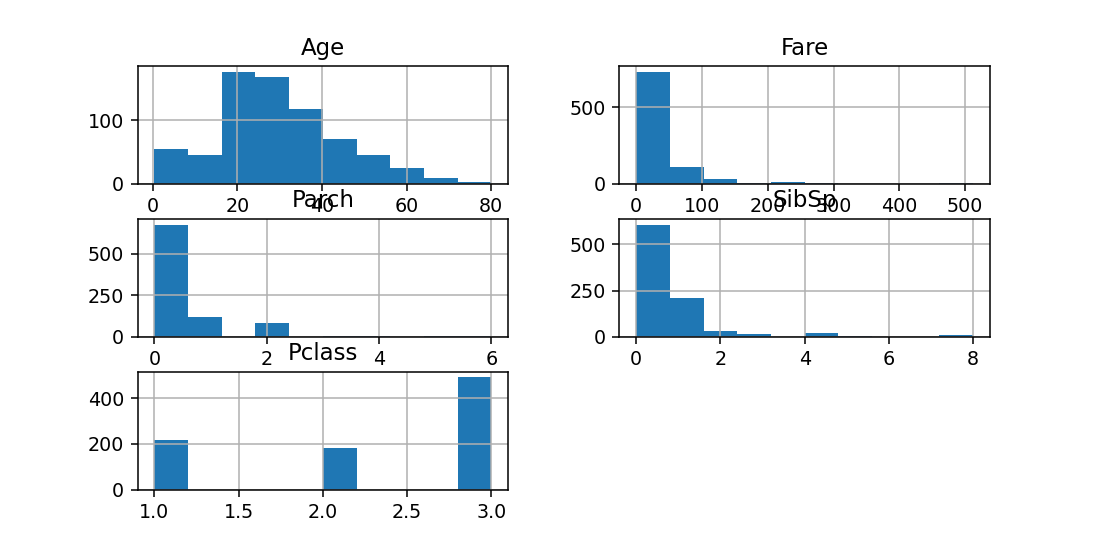

In [25]:
train_df.loc[:,['Age','Fare','Parch','SibSp','Pclass']].hist(figsize=(8,4))
plt.show()

<IPython.core.display.Javascript object>


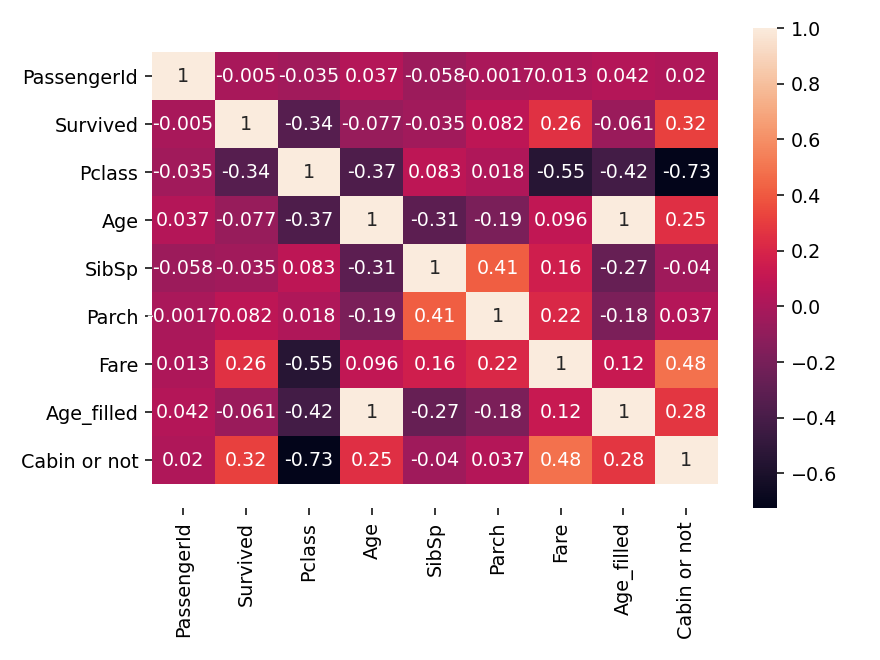

In [26]:
import seaborn as sn

plt.figure()
corrMatrix = train_df.corr()
ax = sn.heatmap(corrMatrix, annot=True) #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


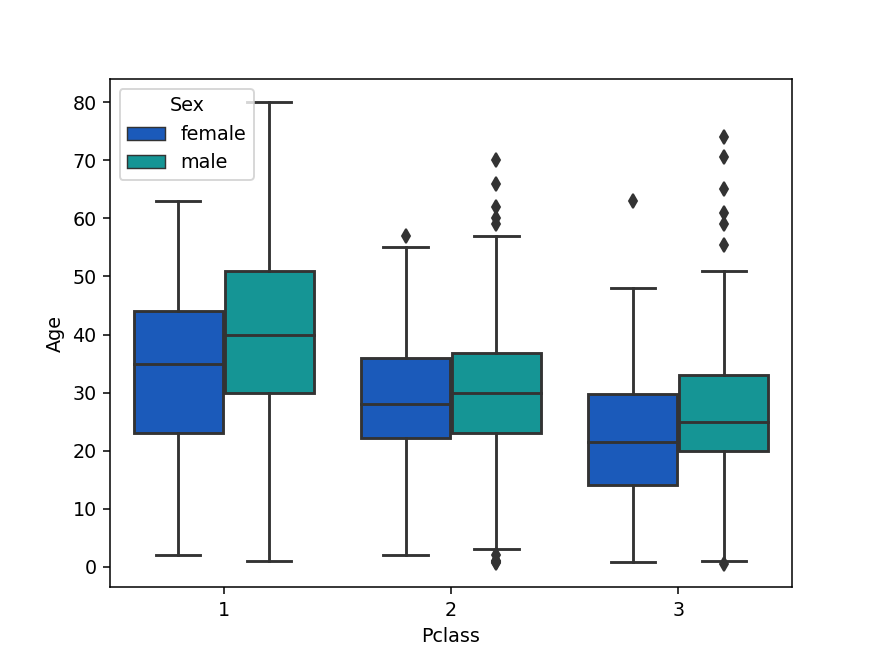

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

In [27]:
plt.figure()
sn.boxplot(x='Pclass',y='Age', hue = 'Sex', data=train_df,palette='winter')

In [28]:
train_df['Age_filled'][train_df["Survived"]==1]

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
875    15.0
879    56.0
880    25.0
887    19.0
889    26.0
Name: Age_filled, Length: 342, dtype: float64

In [29]:
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   418 non-null    int64   
 1   Pclass        418 non-null    int64   
 2   Name          418 non-null    object  
 3   Sex           418 non-null    category
 4   Age           332 non-null    float64 
 5   SibSp         418 non-null    int64   
 6   Parch         418 non-null    int64   
 7   Ticket        418 non-null    object  
 8   Fare          418 non-null    float64 
 9   Cabin         91 non-null     object  
 10  Embarked      418 non-null    object  
 11  Title         418 non-null    category
 12  Age_filled    418 non-null    float64 
 13  Cabin or not  418 non-null    bool    
dtypes: bool(1), category(2), float64(3), int64(4), object(4)
memory usage: 37.8+ KB


In [30]:
test_df.groupby('Title')['Age_filled'].mean()

Title
Col       50.000000
Don       39.000000
Dr        53.000000
Master    10.567143
Miss      22.174231
Mr        30.666667
Mrs       37.368056
Ms        24.000000
Rev       35.500000
Name: Age_filled, dtype: float64

In [31]:
test_df.groupby('Title')['Age_filled'].mean()

Title
Col       50.000000
Don       39.000000
Dr        53.000000
Master    10.567143
Miss      22.174231
Mr        30.666667
Mrs       37.368056
Ms        24.000000
Rev       35.500000
Name: Age_filled, dtype: float64

In [32]:
mask = test_df['Age_filled'].isna()
test_df[mask]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_filled,Cabin or not


In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   891 non-null    int64   
 1   Survived      891 non-null    int64   
 2   Pclass        891 non-null    int64   
 3   Name          891 non-null    object  
 4   Sex           891 non-null    category
 5   Age           714 non-null    float64 
 6   SibSp         891 non-null    int64   
 7   Parch         891 non-null    int64   
 8   Ticket        891 non-null    object  
 9   Fare          891 non-null    float64 
 10  Cabin         204 non-null    object  
 11  Embarked      889 non-null    object  
 12  Title         891 non-null    category
 13  Age_filled    891 non-null    float64 
 14  Cabin or not  891 non-null    bool    
dtypes: bool(1), category(2), float64(3), int64(5), object(4)
memory usage: 87.1+ KB


# ML section for predicting survival / death 

In [34]:
train_df['Cabin or not'] = train_df['Cabin or not'].astype(int)
train_df = train_df.drop(['Age','Cabin','PassengerId','Ticket','Embarked','Name'],axis=1)
test_df['Cabin or not'] = test_df['Cabin or not'].astype(int)

ID = test_df['PassengerId']
test_df = test_df.drop(['Age','Cabin','PassengerId','Ticket','Embarked','Name'],axis=1)


In [35]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Sex           891 non-null    category
 3   SibSp         891 non-null    int64   
 4   Parch         891 non-null    int64   
 5   Fare          891 non-null    float64 
 6   Title         891 non-null    category
 7   Age_filled    891 non-null    float64 
 8   Cabin or not  891 non-null    int32   
dtypes: category(2), float64(2), int32(1), int64(4)
memory usage: 47.9 KB


In [36]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Pclass        418 non-null    int64   
 1   Sex           418 non-null    category
 2   SibSp         418 non-null    int64   
 3   Parch         418 non-null    int64   
 4   Fare          418 non-null    float64 
 5   Title         418 non-null    category
 6   Age_filled    418 non-null    float64 
 7   Cabin or not  418 non-null    int32   
dtypes: category(2), float64(2), int32(1), int64(3)
memory usage: 19.4 KB


In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

column_list = ['Sex','Title']

for column in column_list:
    le.fit(train_df[column])
    train_df[column] = le.transform(train_df[column])
    test_df[column] = le.transform(test_df[column])

In [38]:
train_df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Title,Age_filled,Cabin or not
0,0,3,1,1,0,7.2500,11,22.0,0
1,1,1,0,1,0,71.2833,12,38.0,1
2,1,3,0,0,0,7.9250,8,26.0,0
3,1,1,0,1,0,53.1000,12,35.0,1
4,0,3,1,0,0,8.0500,11,35.0,0


<IPython.core.display.Javascript object>


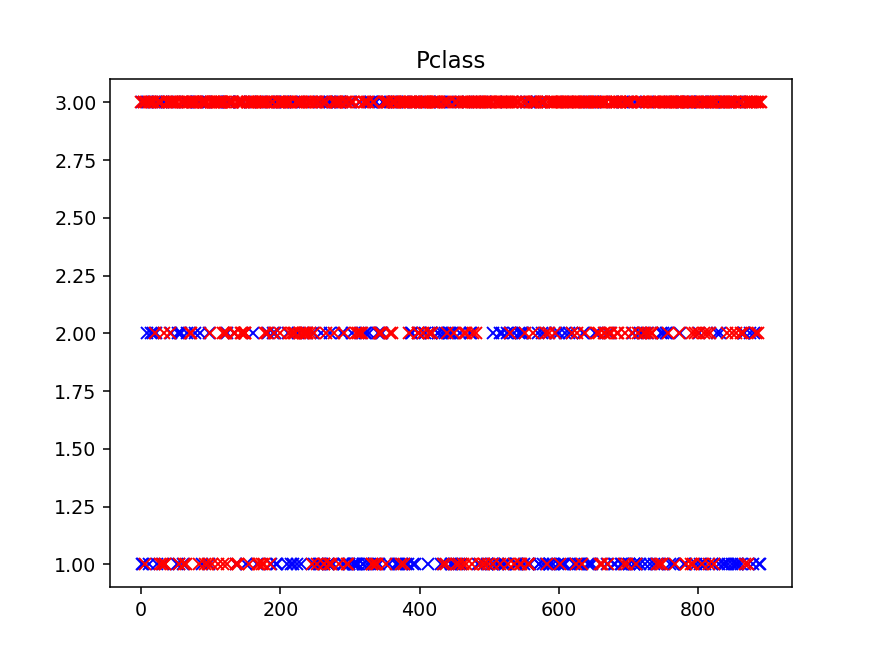

<IPython.core.display.Javascript object>


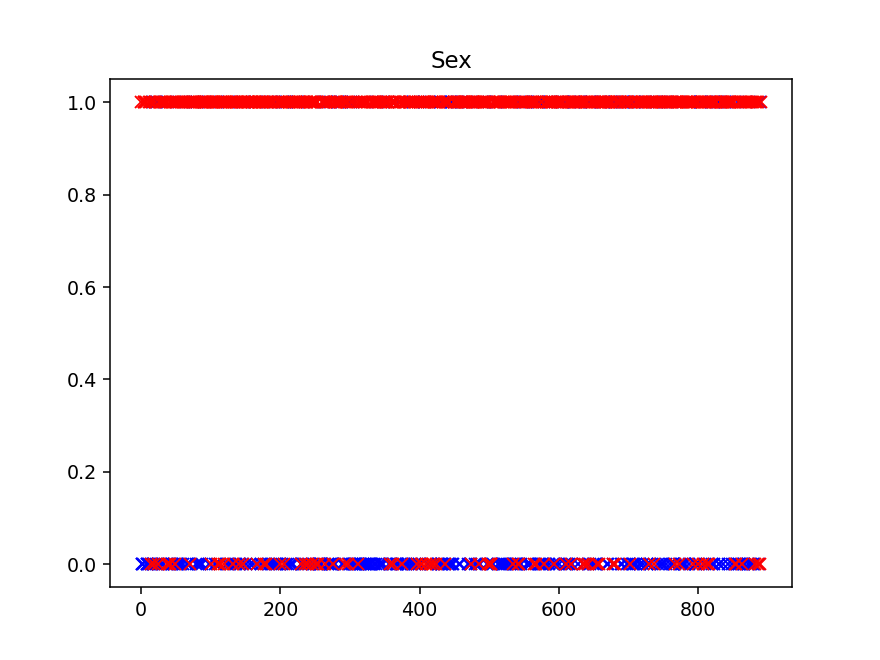

<IPython.core.display.Javascript object>


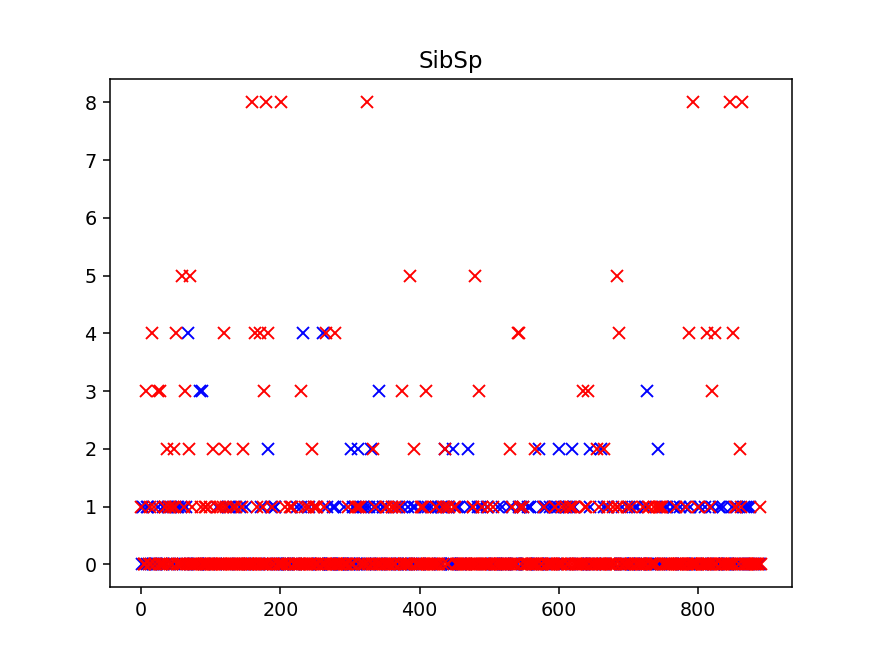

<IPython.core.display.Javascript object>


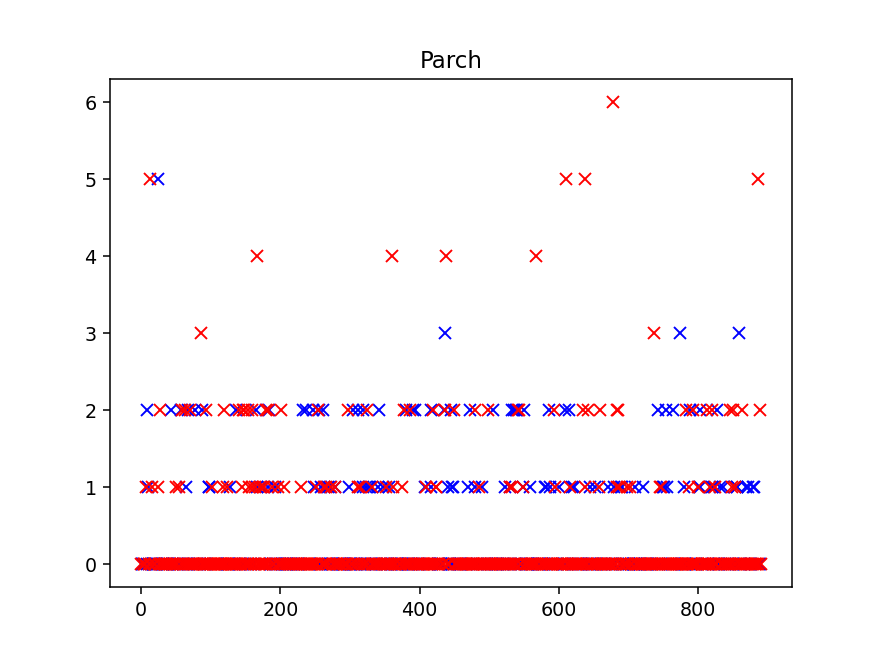

<IPython.core.display.Javascript object>


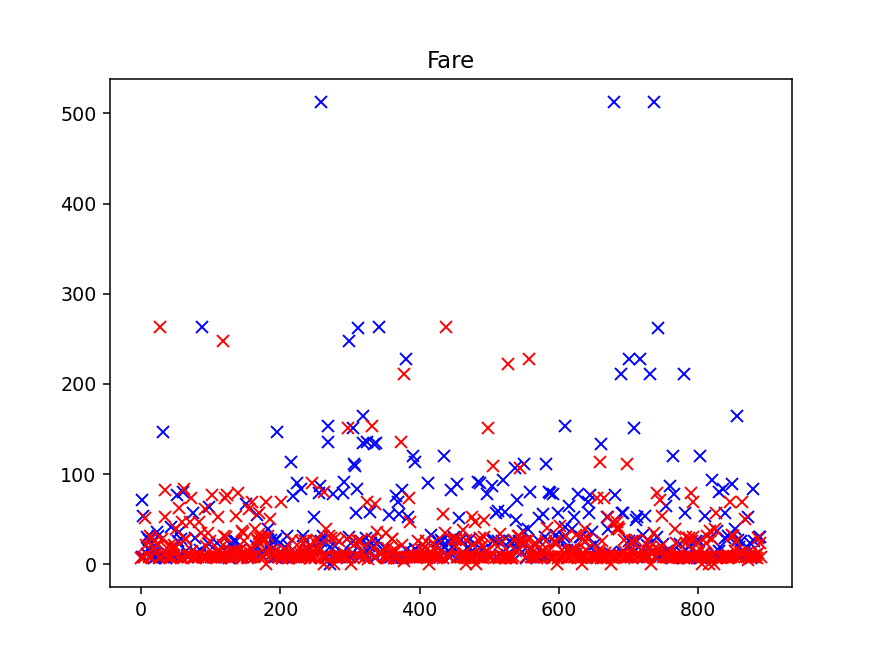

<IPython.core.display.Javascript object>


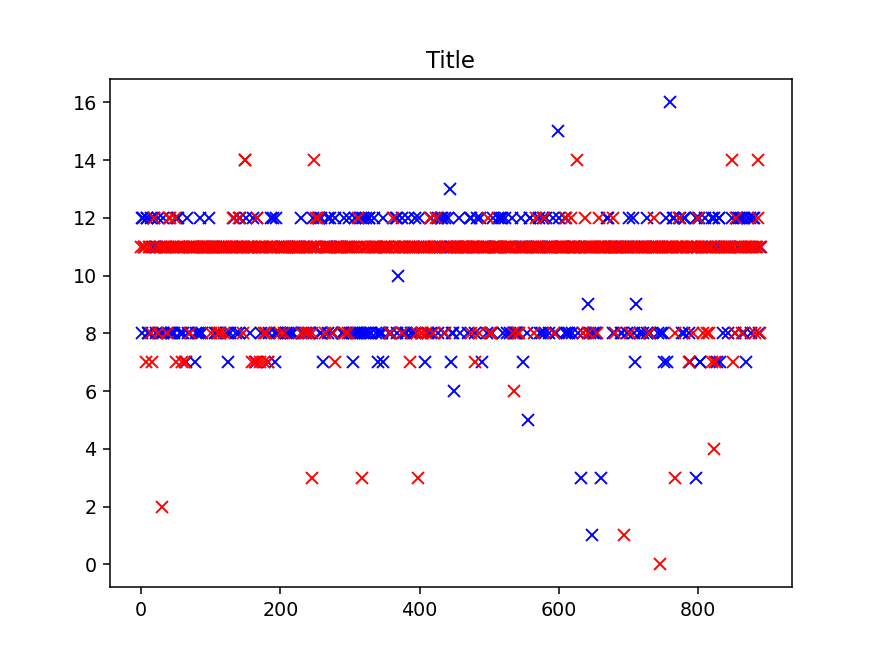

<IPython.core.display.Javascript object>


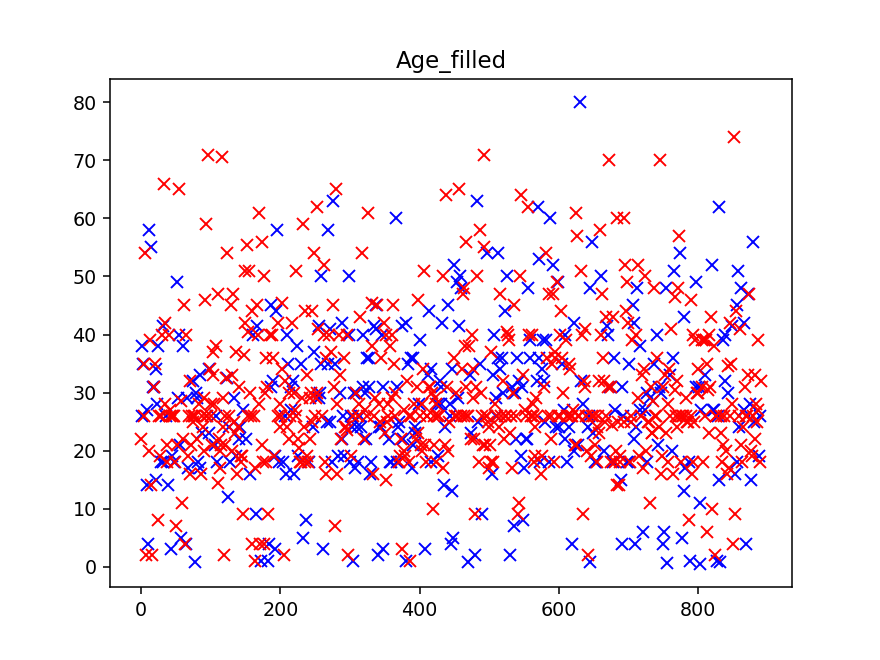

<IPython.core.display.Javascript object>


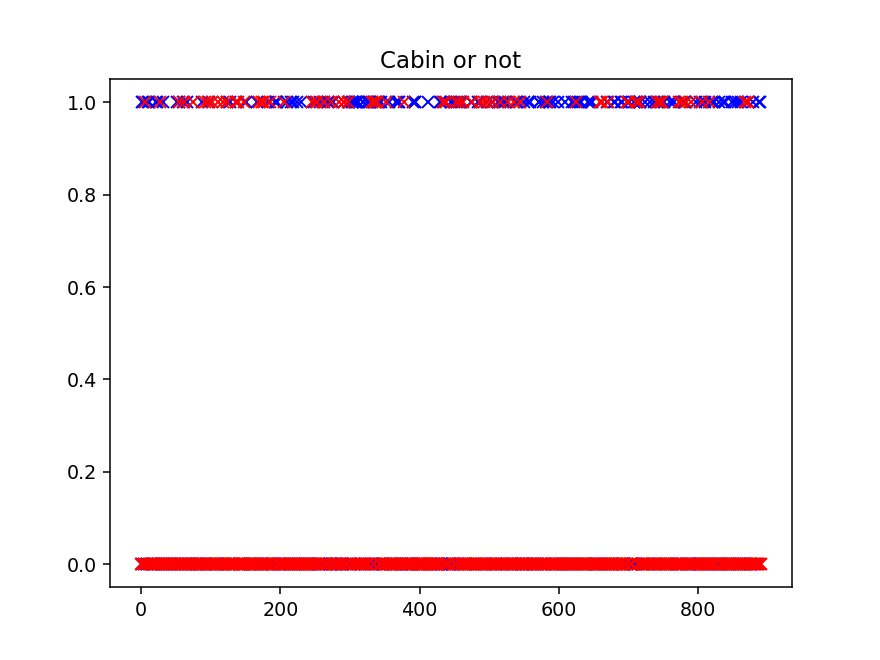

In [39]:
columns = train_df.columns[train_df.columns!= "Survived"]

mask_1 = train_df["Survived"]==1
mask_0 = train_df["Survived"]==0

for column in columns:
    
    fig,ax = plt.subplots()
    ax.plot(train_df[column][mask_1],linestyle='none', marker='x',color="blue")
    ax.plot(train_df[column][mask_0],linestyle='none',marker='x',color="red")
    ax.set_title(column)
    plt.show()
#ax.plot()



In [40]:

X_train = train_df.loc[:, train_df.columns != 'Survived']
y_train = train_df['Survived']
X_test = test_df

In [41]:
%%capture

from sklearn.preprocessing import StandardScaler

for column in X_train.columns:
    # fit on training data column
    scale = StandardScaler().fit(X_train[[column]])

    # transform the training data column
    X_train[column] = scale.transform(X_train[[column]])
    
for column in X_test.columns:
    # fit on training data column
    scale = StandardScaler().fit(X_test[[column]])

    # transform the training data column
    X_test[column] = scale.transform(X_test[[column]])


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [43]:
dfs = []

models = [
          ('LogReg', LogisticRegression()), 
          ('RF', RandomForestClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC()), 
          ('GNB', GaussianNB()),
          ('XGB', XGBClassifier())
        ]
results = []
names = []
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
target_names = ['Dead', 'Survived']


In [44]:
%%capture

for name, model in models:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
    cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
    clf = model.fit(X_train, y_train)
    y_pred = clf.predict(test_df)
    print(name)
    
    results.append(cv_results)
    names.append(name)
    this_df = pd.DataFrame(cv_results)
    this_df['model'] = name
    dfs.append(this_df)
final = pd.concat(dfs, ignore_index=True)

In [45]:
print(final)

    fit_time  score_time  test_accuracy  test_precision_weighted  \
0   0.012999    0.010003       0.754190                 0.756400   
1   0.005999    0.010000       0.837079                 0.838763   
2   0.005001    0.012001       0.808989                 0.812703   
3   0.007001    0.007000       0.797753                 0.796885   
4   0.004999    0.008001       0.808989                 0.810572   
5   0.189398    0.030009       0.821229                 0.825563   
6   0.170042    0.042824       0.808989                 0.809035   
7   0.196032    0.030007       0.797753                 0.806573   
8   0.170043    0.040011       0.814607                 0.816355   
9   0.172908    0.027061       0.853933                 0.853018   
10  0.000000    0.020006       0.765363                 0.766861   
11  0.000000    0.020006       0.814607                 0.813883   
12  0.000000    0.020009       0.780899                 0.797869   
13  0.000000    0.020004       0.792135         

In [46]:
model = models[0][1]
clf = model.fit(X_train, y_train)
y_pred = clf.predict(test_df)

In [47]:
print(test_df)

       Pclass       Sex     SibSp     Parch      Fare     Title  Age_filled  \
0    0.873482  0.755929 -0.499470 -0.400248 -0.498407  0.373619    0.393048   
1    0.873482 -1.322876  0.616992 -0.400248 -0.513274  0.941520    1.356309   
2   -0.315819  0.755929 -0.499470 -0.400248 -0.465088  0.373619    2.512223   
3    0.873482  0.755929 -0.499470 -0.400248 -0.483466  0.373619   -0.184909   
4    0.873482 -1.322876  0.616992  0.619896 -0.418471  0.941520   -0.570214   
..        ...       ...       ...       ...       ...       ...         ...   
413  0.873482  0.755929 -0.499470 -0.400248 -0.494448  0.373619   -0.416092   
414 -1.505120 -1.322876 -0.499470 -0.400248  1.313753 -4.737488    0.739822   
415  0.873482  0.755929 -0.499470 -0.400248 -0.508792  0.373619    0.701291   
416  0.873482  0.755929 -0.499470 -0.400248 -0.494448  0.373619   -0.416092   
417  0.873482  0.755929  0.616992  0.619896 -0.237906 -1.897984   -0.416092   

     Cabin or not  
0       -0.527530  
1       -0.

In [48]:
data = [ID,y_pred]

In [49]:
gender_submission = ID.to_frame()
gender_submission['Survived'] = y_pred

In [50]:
gender_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [51]:
gender_submission.to_csv('gender_submission.csv',index=False)